In [2]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/raw/job_offer.tsv", delimiter='\t', encoding="utf-8")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,35,36,39,40,41,42,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.columns.values

array(['Unnamed: 0', 'ACTIVITY_CODE', 'ACTIVITY_NAME',
       'ANNUAL_MAXIMUM_SALARY', 'ANNUAL_MINIMUM_SALARY', 'CITY_CODE',
       'CITY_NAME', 'CONTINENT_CODE', 'CONTINENT_NAME',
       'CONTRACT_DURATION', 'CONTRACT_DUR_UNIT_CODE',
       'CONTRACT_DUR_UNIT_NAME', 'CONTRACT_NATURE_CODE',
       'CONTRACT_NATURE_NAME', 'CONTRACT_TYPE_CODE', 'CONTRACT_TYPE_NAME',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'CREATION_DATE',
       'DEGREE_DIPLOMA_NAME_1', 'DEGREE_DIPLOMA_NAME_2',
       'DEGREE_REQUIRED_CODE_1', 'DEGREE_REQUIRED_CODE_2',
       'DEGREE_REQUIRED_NAME_1', 'DEGREE_REQUIRED_NAME_2',
       'DEGREE_SUBJECT_AREA_CODE_1', 'DEGREE_SUBJECT_AREA_CODE_2',
       'DEGREE_SUBJECT_AREA_NAME_1', 'DEGREE_SUBJECT_AREA_NAME_2',
       'DEGREE_TYPE_CODE_1', 'DEGREE_TYPE_CODE_2', 'DEGREE_TYPE_NAME_1',
       'DEGREE_TYPE_NAME_2', 'DEPARTEMENT_CODE', 'DEPARTEMENT_NAME',
       'DESKTOP_TOOLS_CODE_1', 'DESKTOP_TOOLS_CODE_2',
       'DESKTOP_TOOLS_LEV_CODE_1', 'DESKTOP_TOOLS_LEV_CODE_2',
       '

In [5]:
pd.set_option('display.max_columns', None)
data.describe()

,Unnamed: 0,ANNUAL_MAXIMUM_SALARY,ANNUAL_MINIMUM_SALARY,CONTRACT_DURATION,DEGREE_SUBJECT_AREA_CODE_1,DEGREE_SUBJECT_AREA_CODE_2,DESKTOP_TOOLS_LEV_CODE_1,DESKTOP_TOOLS_LEV_CODE_2,EXPERIENCE_MAX_DURATION,EXPERIENCE_MIN_DURATION,FLAG_RELATION,LANG_PROFICIENCY_CODE_1,LANG_PROFICIENCY_CODE_2,LATITUDE,LONGITUDE,MAXIMUM_SALARY,MINIMUM_SALARY,MONITORING_AGENCY_CODE,NB_MONTH_SALARY,NB_VACANCIES_CREATION,NB_VACANCIES_LEFT,NUMBER_OF_APPLICATION,POSTCODE,QUALIFICATION_CODE,REGION_CODE,ROME_PROFESSION_CODE,SALARY_SUPPLEMENT_CODE_1,SALARY_SUPPLEMENT_CODE_2,TRAVEL_FREQUENCY_CODE,TRAVEL_TYPE_CODE,TRAVEL_TYPE_COMMENT,WEEKLY_WORKING_HOURS,WEEKLY_WORKING_MINUTES,WORKFORCE,_id
count,211581.00000,118125.000000,181635.000000,113274.000000,80227.000000,9226.000000,83.000000,93.000000,0.0,140473.000000,211581.000000,14007.000000,2067.000000,198617.000000,198617.000000,109618.000000,175376.000000,211581.000000,147863.000000,211581.000000,211581.000000,211581.000000,198912.000000,211581.000000,209694.00000,211581.000000,74902.000000,16214.000000,35390.000000,20672.000000,0.0,206742.000000,7578.000000,211581.000000,211581.00000
mean,105790.00000,24849.181798,19643.832385,7.360524,27629.443093,27569.039129,2.084337,2.129032,NaN,2.849729,0.113720,2.468123,2.656991,46.369779,2.531832,7673.925286,4286.972221,52972.771019,12.078229,1.108724,1.108918,4.272487,51717.772306,5.464550,53.53363,16036.845284,1.201730,6.352473,2.520712,1.471072,NaN,32.594751,34.670098,10.127856,105791.00000
std,61078.31799,32353.008619,21687.358030,10.342932,15424.787393,13824.815706,0.473823,0.575322,NaN,2.036771,0.317472,1.256072,1.258429,5.342743,5.872556,17050.179777,9720.121701,26277.949363,0.317448,1.180150,1.242235,9.469658,26272.275814,1.824298,28.01943,5905.860653,2.357587,2.588144,1.261689,0.847261,NaN,8.239708,10.394763,15.456862,61078.31799
min,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,1.000000,-21.378611,-63.084722,2.500000,2.440000,483.000000,12.000000,1.000000,0.000000,0.000000,209.000000,1.000000,1.00000,10201.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.00000
25%,52895.00000,18600.000000,17763.200000,3.000000,21538.000000,22103.000000,2.000000,2.000000,NaN,1.000000,0.000000,1.000000,2.000000,44.924722,0.159167,12.000000,9.760000,33033.000000,12.000000,1.000000,1.000000,0.000000,31130.000000,5.000000,28.00000,11999.000000,0.000000,6.000000,1.000000,1.000000,NaN,35.000000,30.000000,1.000000,52896.00000
50%,105790.00000,22000.000000,18582.200000,6.000000,31845.000000,31054.000000,2.000000,2.000000,NaN,2.000000,0.000000,3.000000,3.000000,47.211389,2.400000,1700.000000,1184.210000,56026.000000,12.000000,1.000000,1.000000,1.000000,51220.000000,6.000000,52.00000,14812.000000,0.000000,7.000000,3.000000,1.000000,NaN,35.000000,30.000000,3.000000,105791.00000
75%,158685.00000,27600.000000,21600.000000,7.000000,42752.000000,42032.000000,2.000000,2.000000,NaN,3.000000,0.000000,3.000000,4.000000,48.754167,4.958889,2600.000000,1800.000000,75106.000000,12.000000,1.000000,1.000000,5.000000,74150.000000,6.000000,76.00000,18109.000000,1.000000,8.000000,4.000000,2.000000,NaN,35.000000,45.000000,12.000000,158686.00000
max,211580.00000,1000000.000000,1000000.000000,99.000000,71854.000000,71454.000000,3.000000,3.000000,NaN,48.000000,1.000000,5.000000,5.000000,51.071111,55.792222,800000.000000,380000.000000,97710.000000,32.000000,200.000000,200.000000,450.000000,98809.000000,9.000000,94.00000,39046.000000,10.000000,10.000000,4.000000,4.000000,NaN,56.000000,59.000000,99.000000,211581.00000


In [6]:
data.head()

,Unnamed: 0,ACTIVITY_CODE,ACTIVITY_NAME,ANNUAL_MAXIMUM_SALARY,ANNUAL_MINIMUM_SALARY,CITY_CODE,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,CONTRACT_DURATION,CONTRACT_DUR_UNIT_CODE,CONTRACT_DUR_UNIT_NAME,CONTRACT_NATURE_CODE,CONTRACT_NATURE_NAME,CONTRACT_TYPE_CODE,CONTRACT_TYPE_NAME,COUNTRY_CODE,COUNTRY_NAME,CREATION_DATE,DEGREE_DIPLOMA_NAME_1,DEGREE_DIPLOMA_NAME_2,DEGREE_REQUIRED_CODE_1,DEGREE_REQUIRED_CODE_2,DEGREE_REQUIRED_NAME_1,DEGREE_REQUIRED_NAME_2,DEGREE_SUBJECT_AREA_CODE_1,DEGREE_SUBJECT_AREA_CODE_2,DEGREE_SUBJECT_AREA_NAME_1,DEGREE_SUBJECT_AREA_NAME_2,DEGREE_TYPE_CODE_1,DEGREE_TYPE_CODE_2,DEGREE_TYPE_NAME_1,DEGREE_TYPE_NAME_2,DEPARTEMENT_CODE,DEPARTEMENT_NAME,DESKTOP_TOOLS_CODE_1,DESKTOP_TOOLS_CODE_2,DESKTOP_TOOLS_LEV_CODE_1,DESKTOP_TOOLS_LEV_CODE_2,DESKTOP_TOOLS_LEV_NAME_1,DESKTOP_TOOLS_LEV_NAME_2,DESKTOP_TOOLS_NAME_1,DESKTOP_TOOLS_NAME_2,DISABLED_ACCESSIBILITY,DRIVING_LIC_CODE_1,DRIVING_LIC_CODE_2,DRIVING_LIC_NAME_1,DRIVING_LIC_NAME_2,DRIVING_LIC_REQ_CODE_1,DRIVING_LIC_REQ_CODE_2,DRIVING_LIC_REQ_NAME_1,DRIVING_LIC_REQ_NAME_2,EMPLOYER_CONSENT,EM_INTERVIEW_MODALITY_CODE,EM_INTERVIEW_MODALITY_NAME,EXPERIENCE_CODE,EXPERIENCE_MAX_DURATION,EXPERIENCE_MIN_DURATION,EXPERIENCE_NAME,EXP_DURATION_TYPE_CODE,EXP_DURATION_TYPE_NAME,FLAG_RELATION,LANG_CODE_1,LANG_CODE_2,LANG_NAME_1,LANG_NAME_2,LANG_PROFICIENCY_CODE_1,LANG_PROFICIENCY_CODE_2,LANG_PROFICIENCY_NAME_1,LANG_PROFICIENCY_NAME_2,LANG_REQUIRED_CODE_1,LANG_REQUIRED_CODE_2,LANG_REQUIRED_NAME_1,LANG_REQUIRED_NAME_2,LATITUDE,LONGITUDE,MAXIMUM_SALARY,MINIMUM_SALARY,MODIFICATION_DATE,MONITORING_AGENCY_CODE,NB_MONTH_SALARY,NB_VACANCIES_CREATION,NB_VACANCIES_LEFT,NUMBER_OF_APPLICATION,POSTCODE,QUALIFICATION_CODE,QUALIFICATION_NAME,REGION_CODE,REGION_NAME,ROME_LIST_ACTIVITY_CODE,ROME_LIST_SKILL_CODE,ROME_LIST_WORK_ENV_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME,ROME_PROFESSION_CODE,ROME_PROFESSION_NAME,SALARY_COMMENT,SALARY_SUPPLEMENT_CODE_1,SALARY_SUPPLEMENT_CODE_2,SALARY_SUPPLEMENT_NAME_1,SALARY_SUPPLEMENT_NAME_2,SALARY_TYPE_CODE,SALARY_TYPE_NAME,SALARY_UNIT_CODE,SERVICE_TYPE_CODE,SERVICE_TYPE_NAME,STATUS_CODE,STATUS_NAME,SUB_CONTINENT_CODE,SUB_CONTINENT_NAME,TRAVEL_FREQUENCY_CODE,TRAVEL_FREQUENCY_COMMENT,TRAVEL_FREQUENCY_NAME,TRAVEL_TYPE_CODE,TRAVEL_TYPE_COMMENT,TRAVEL_TYPE_NAME,WAGE_UNIT_NAME,WEEKLY_WORKING_HOURS,WEEKLY_WORKING_MINUTES,WORKFORCE,WORKING_CONDITION_CODE,WORKING_CONDITION_COMMENT,WORKING_CONDITION_NAME,WORKING_HOURS_TYPE_CODE,WORKING_HOURS_TYPE_COMMENT,WORKING_HOURS_TYPE_NAME,WORKING_LOCATION_NAME,WORKING_LOCATION_TYPE_CODE,WORKING_LOCATION_TYPE_NAME,_id
0,0,6420Z,Activités des sociétés holding,NaN,22800.0,85243,BREM SUR MER,NaN,NaN,2.0,MO,Mois,E1,Contrat tout public,SAI,Contrat travail saisonnier,01,FRANCE,06/03/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,VENDEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,MEL,Envoyer votre CV par mail,E,NaN,2.0,Expérience exigée,AN,An(s),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.604722,-1.831389,NaN,1900.00,06/03/17,85034,12.0,1,1,0,85470.0,5,Employé non qualifié,52.0,Pays de la Loire,103848,103888;103890;103892,NaN,G1202,Animation d'activités culturelles ou ludiques,11036,Animateur / Animatrice de village de vacances,NaN,NaN,NaN,NaN,NaN,M,Mensuel,EU,APP,En appui,EC,En cours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Euros,42.0,NaN,0,AUT,NaN,Autre,NOR,NaN,Horaires normaux,BREM SUR MER,CO,Une commune,33615
1,1,7820Z,Activités des agences de travail temporaire,19000.0,18000.0,13206,MARSEILLE 06,NaN,NaN,4.0,MO,Mois,E1,Contrat tout public,CDD,Contrat à durée déterminée,01,FRANCE,07/03/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,BOUCHES-DU-RHONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,MEL,Envoyer votre CV par mail,E,NaN,2.0,Expérience exigée,AN,An(s),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.287500,5.380833,19000.0,18000.00,08/03/17,13483,12.0,1,1,7,13006.0,6,Employé qualifié,93.0,Provence Alpes Côte d'Azur,100343,119320;119324;1

In [7]:
data.dtypes

Unnamed: 0                      int64
ACTIVITY_CODE                  object
ACTIVITY_NAME                  object
ANNUAL_MAXIMUM_SALARY         float64
ANNUAL_MINIMUM_SALARY         float64
CITY_CODE                      object
CITY_NAME                      object
CONTINENT_CODE                 object
CONTINENT_NAME                 object
CONTRACT_DURATION             float64
CONTRACT_DUR_UNIT_CODE         object
CONTRACT_DUR_UNIT_NAME         object
CONTRACT_NATURE_CODE           object
CONTRACT_NATURE_NAME           object
CONTRACT_TYPE_CODE             object
CONTRACT_TYPE_NAME             object
COUNTRY_CODE                   object
COUNTRY_NAME                   object
CREATION_DATE                  object
DEGREE_DIPLOMA_NAME_1          object
DEGREE_DIPLOMA_NAME_2          object
DEGREE_REQUIRED_CODE_1         object
DEGREE_REQUIRED_CODE_2         object
DEGREE_REQUIRED_NAME_1         object
DEGREE_REQUIRED_NAME_2         object
DEGREE_SUBJECT_AREA_CODE_1    float64
DEGREE_SUBJE

In [8]:
count = data.count()
count

Unnamed: 0                    211581
ACTIVITY_CODE                 211581
ACTIVITY_NAME                 211581
ANNUAL_MAXIMUM_SALARY         118125
ANNUAL_MINIMUM_SALARY         181635
CITY_CODE                     198935
CITY_NAME                     198843
CONTINENT_CODE                  1887
CONTINENT_NAME                  1887
CONTRACT_DURATION             113274
CONTRACT_DUR_UNIT_CODE        113284
CONTRACT_DUR_UNIT_NAME        113284
CONTRACT_NATURE_CODE          211581
CONTRACT_NATURE_NAME          211560
CONTRACT_TYPE_CODE            211581
CONTRACT_TYPE_NAME            211581
COUNTRY_CODE                  211569
COUNTRY_NAME                  211284
CREATION_DATE                 211581
DEGREE_DIPLOMA_NAME_1          27049
DEGREE_DIPLOMA_NAME_2           3403
DEGREE_REQUIRED_CODE_1         80227
DEGREE_REQUIRED_CODE_2          9226
DEGREE_REQUIRED_NAME_1         80227
DEGREE_REQUIRED_NAME_2          9226
DEGREE_SUBJECT_AREA_CODE_1     80227
DEGREE_SUBJECT_AREA_CODE_2      9226
D

In [9]:
type_code = dict()
for x in data["CONTRACT_TYPE_NAME"].unique():
    type_code[x] = [data["CONTRACT_TYPE_NAME"][data["CONTRACT_TYPE_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

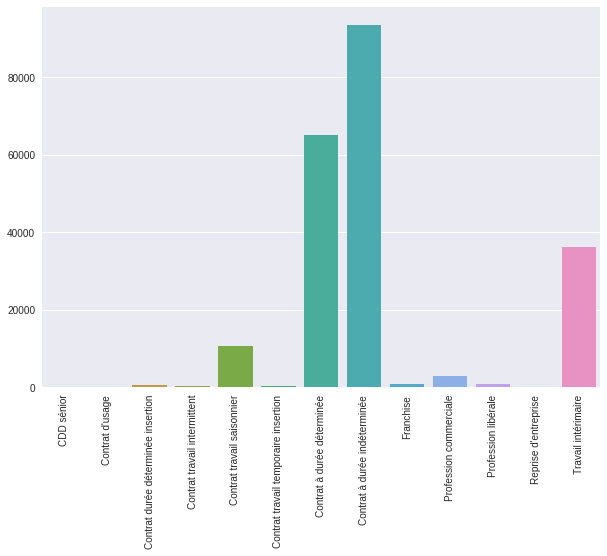

In [10]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [11]:
type_code = dict()
for x in data["CONTRACT_NATURE_NAME"].unique():
    if x != "E1" and x != "Contrat tout public" and type(x) is str:
        type_code[x] = [data["CONTRACT_NATURE_NAME"][data["CONTRACT_NATURE_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

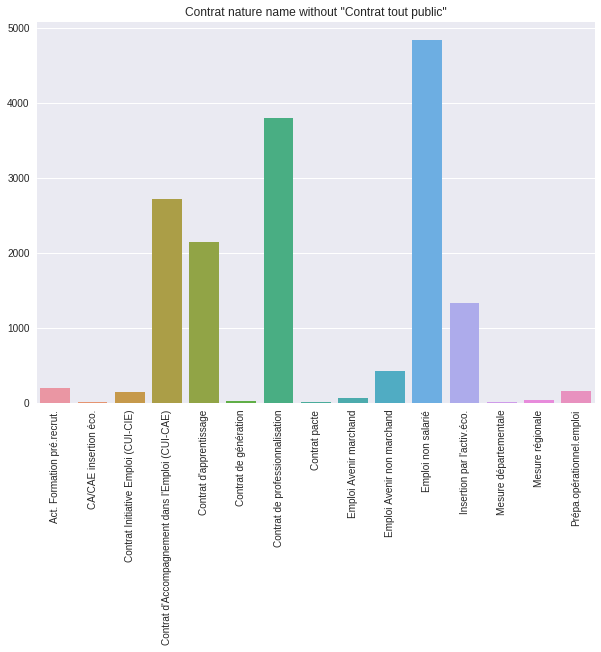

In [12]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
g.set_title('Contrat nature name without "Contrat tout public"')
plt.show()

In [13]:
type_code = dict()
for x in data["EXPERIENCE_NAME"].unique():
    type_code[x] = [data["EXPERIENCE_NAME"][data["EXPERIENCE_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

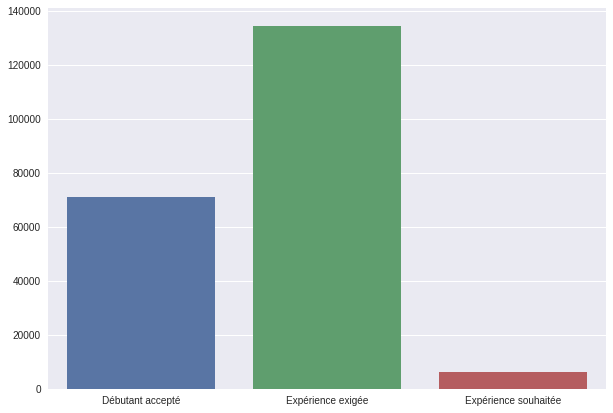

In [14]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
plt.show()

In [15]:
type_code = dict()
for x in data["QUALIFICATION_NAME"].unique():
    type_code[x] = [data["QUALIFICATION_NAME"][data["QUALIFICATION_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

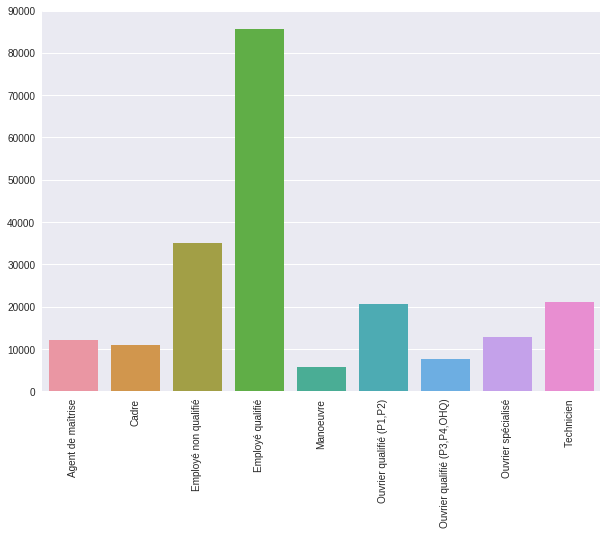

In [16]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [17]:
type_code = dict()
for x in data["WORKING_LOCATION_TYPE_NAME"].unique():
    type_code[x] = [data["WORKING_LOCATION_TYPE_NAME"][data["WORKING_LOCATION_TYPE_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

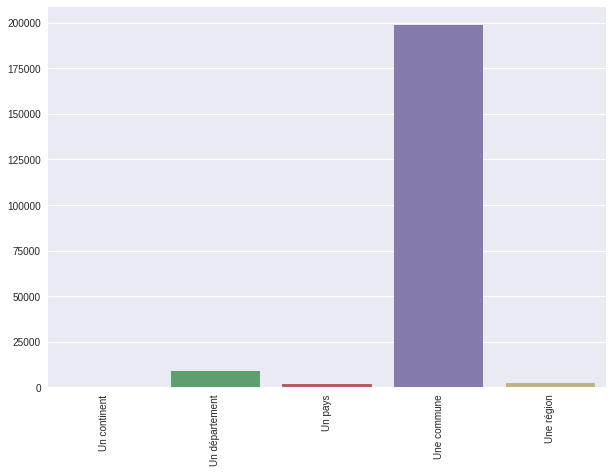

In [18]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [19]:
type_code = dict()
for x in data["REGION_NAME"].unique():
    if type(x) is str:
        type_code[x] = [data["REGION_NAME"][data["REGION_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

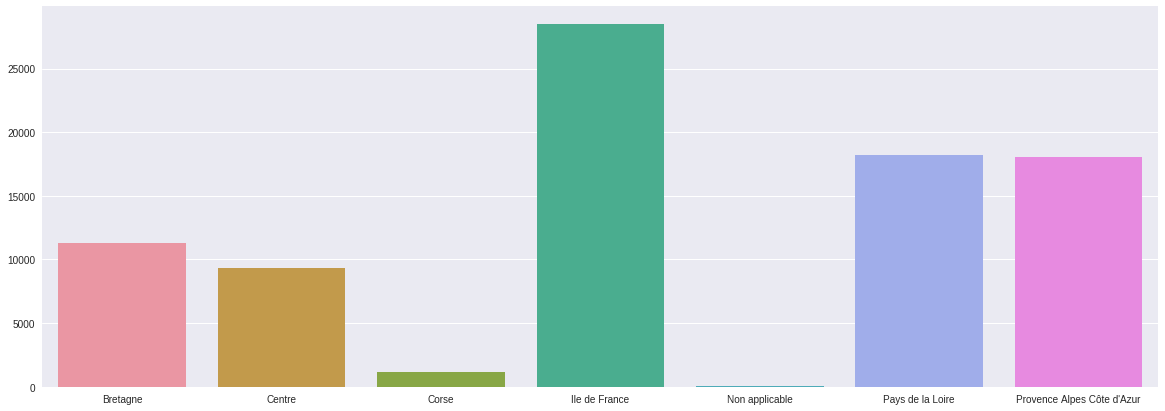

In [20]:
plt.figure(figsize=(20, 7))
g = sns.barplot(data=type_code)
plt.show()

In [21]:
type_code = dict()
for x in data["DEPARTEMENT_NAME"].unique():
    if type(x) is str:
        type_code[x] = [data["DEPARTEMENT_NAME"][data["DEPARTEMENT_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

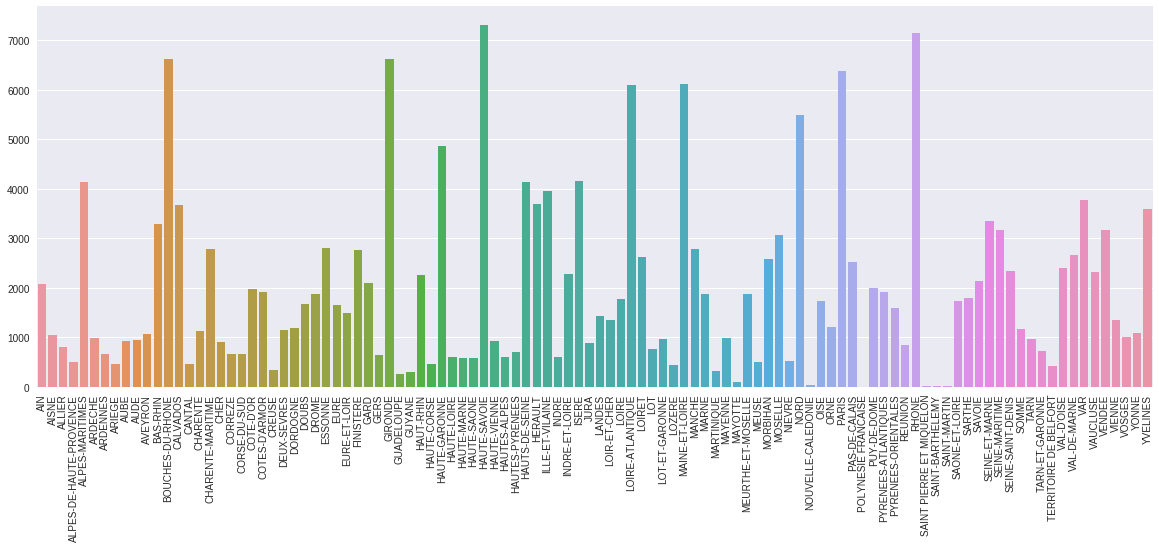

In [22]:
plt.figure(figsize=(20, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

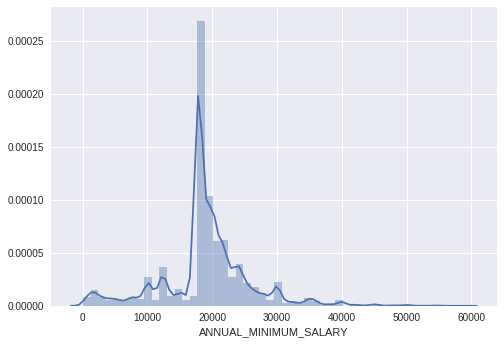

In [23]:
tmp = data[['ANNUAL_MINIMUM_SALARY']].copy().dropna(how='any')
tmp = tmp[tmp['ANNUAL_MINIMUM_SALARY'] > 0]
tmp = tmp[tmp['ANNUAL_MINIMUM_SALARY'] < 60000]
sns.distplot(tmp['ANNUAL_MINIMUM_SALARY'])
plt.show()

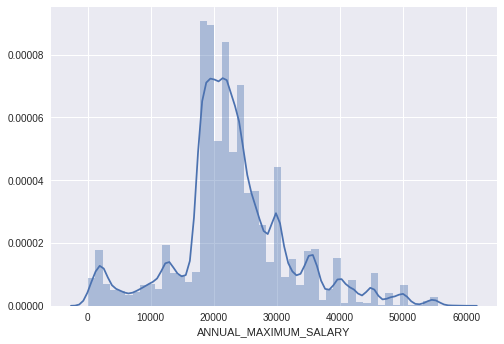

In [24]:
tmp = data[['ANNUAL_MAXIMUM_SALARY']].copy().dropna(how='any')
tmp = tmp[tmp['ANNUAL_MAXIMUM_SALARY'] > 0]
tmp = tmp[tmp['ANNUAL_MAXIMUM_SALARY'] < 60000]
sns.distplot(tmp['ANNUAL_MAXIMUM_SALARY'])
plt.show()

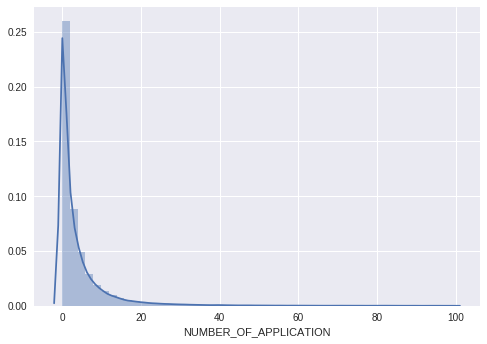

In [25]:
tmp = data[['NUMBER_OF_APPLICATION']].copy().dropna(how='any')
tmp = tmp[tmp['NUMBER_OF_APPLICATION'] < 100]
sns.distplot(tmp['NUMBER_OF_APPLICATION'])
plt.show()

In [26]:
type_code = dict()
for x in data["DEGREE_TYPE_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["DEGREE_TYPE_NAME_1"][data["DEGREE_TYPE_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

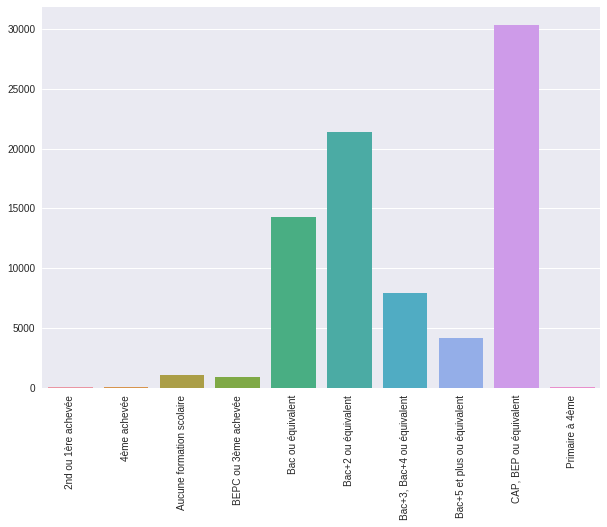

In [27]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [28]:
type_code = dict()
for x in data["DEGREE_TYPE_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["DEGREE_TYPE_NAME_2"][data["DEGREE_TYPE_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

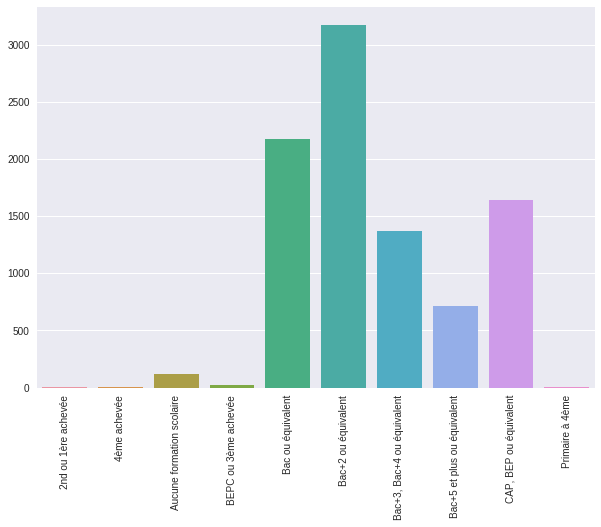

In [29]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [30]:
type_code = dict()
for x in data["DEGREE_REQUIRED_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["DEGREE_REQUIRED_NAME_1"][data["DEGREE_REQUIRED_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

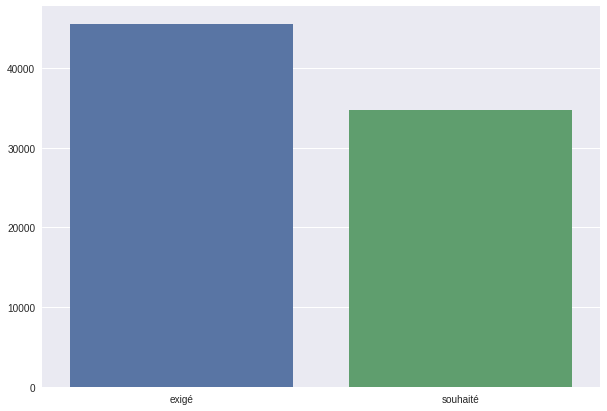

In [31]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
plt.show()

In [32]:
type_code = dict()
for x in data["DEGREE_REQUIRED_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["DEGREE_REQUIRED_NAME_2"][data["DEGREE_REQUIRED_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

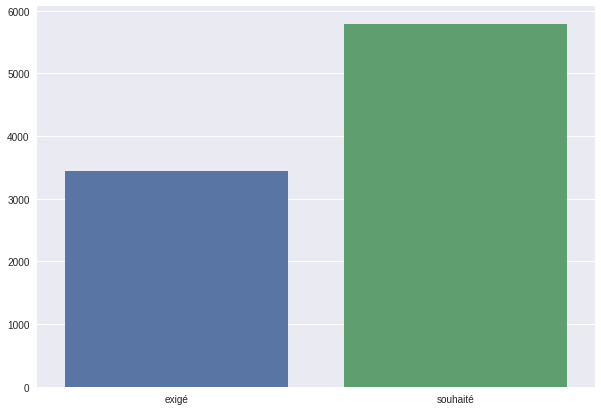

In [33]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
plt.show()

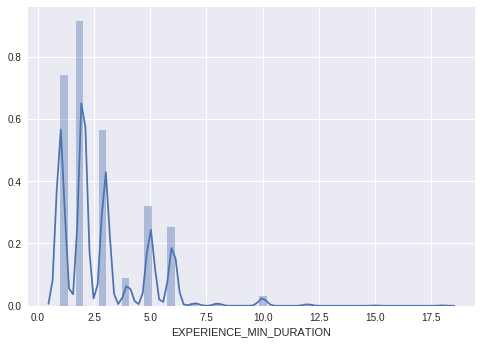

In [34]:
tmp = data[['EXPERIENCE_MIN_DURATION']].copy()
tmp = tmp[tmp['EXPERIENCE_MIN_DURATION'] < 20]
sns.distplot(tmp['EXPERIENCE_MIN_DURATION'])
plt.show()

In [35]:
type_code = dict()
for x in data["LANG_PROFICIENCY_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_PROFICIENCY_NAME_1"][data["LANG_PROFICIENCY_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

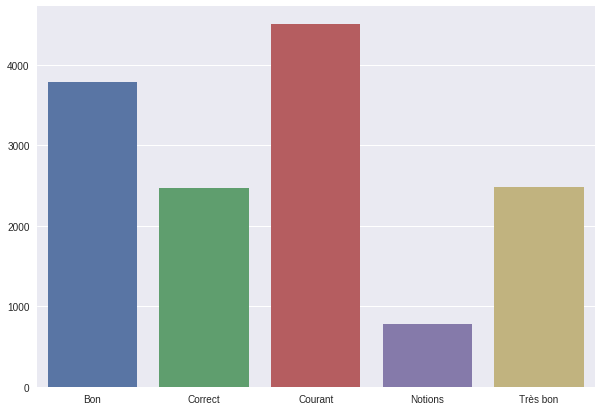

In [36]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
plt.show()

In [37]:
type_code = dict()
for x in data["LANG_PROFICIENCY_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_PROFICIENCY_NAME_2"][data["LANG_PROFICIENCY_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

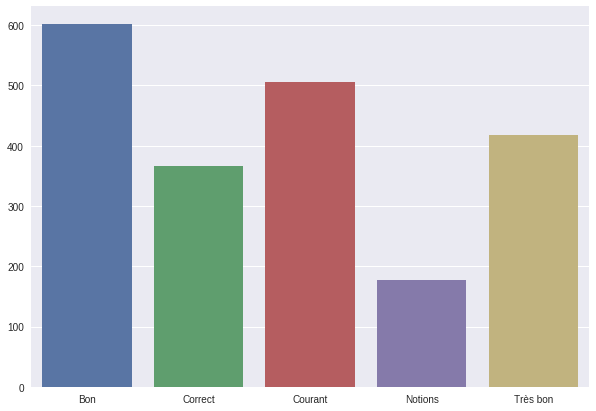

In [38]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
plt.show()

In [39]:
type_code = dict()
for x in data["LANG_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_NAME_1"][data["LANG_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

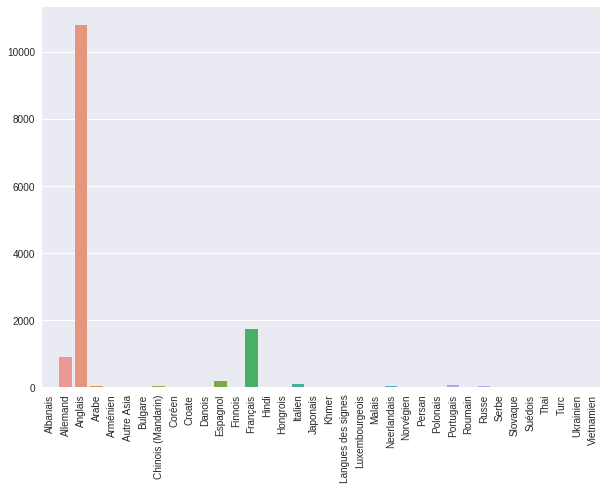

In [40]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [41]:
type_code = dict()
for x in data["LANG_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_NAME_2"][data["LANG_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

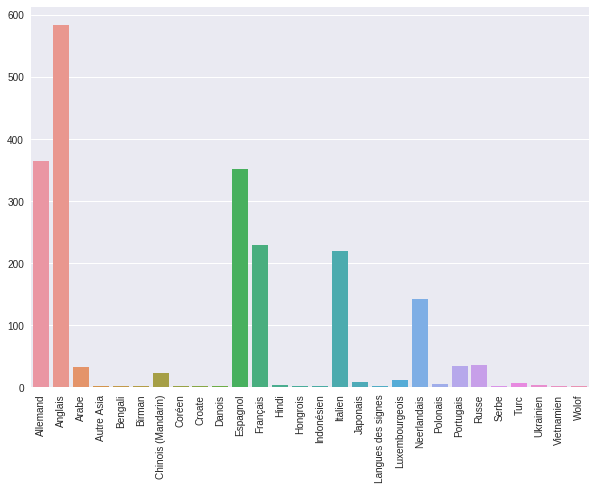

In [42]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [43]:
type_code = dict()
for x in data["LANG_REQUIRED_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_REQUIRED_NAME_1"][data["LANG_REQUIRED_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

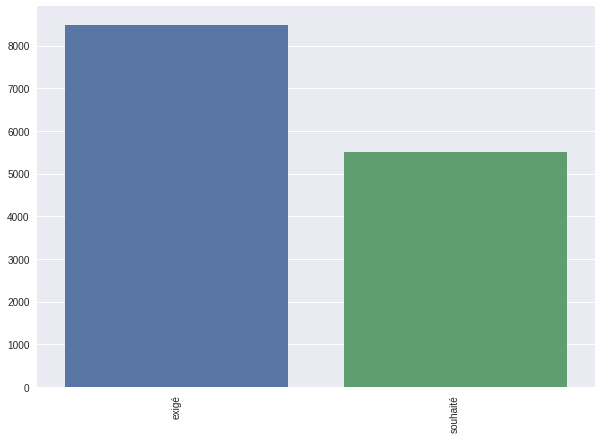

In [44]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [45]:
type_code = dict()
for x in data["LANG_REQUIRED_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["LANG_REQUIRED_NAME_2"][data["LANG_REQUIRED_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

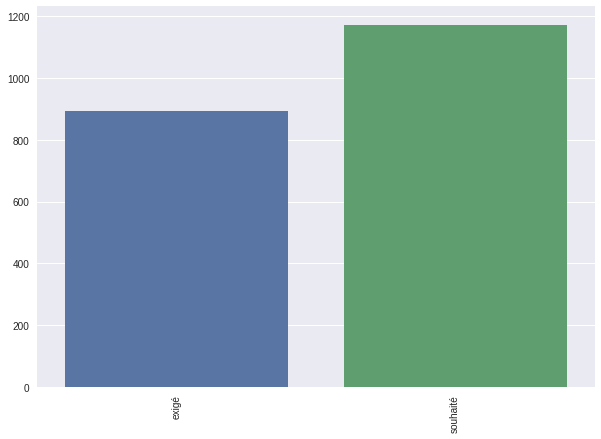

In [46]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [47]:
type_code = dict()
for x in data["SALARY_SUPPLEMENT_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["SALARY_SUPPLEMENT_NAME_1"][data["SALARY_SUPPLEMENT_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

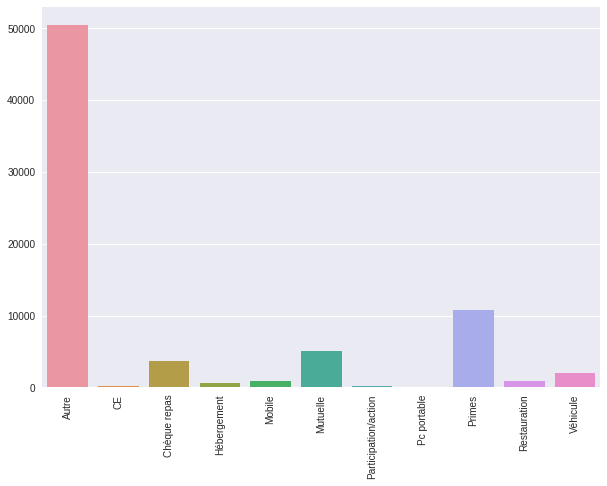

In [48]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [49]:
type_code = dict()
for x in data["SALARY_SUPPLEMENT_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["SALARY_SUPPLEMENT_NAME_2"][data["SALARY_SUPPLEMENT_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

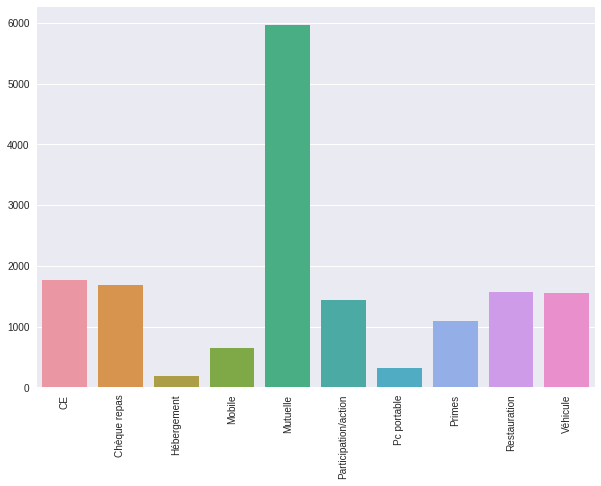

In [50]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [51]:
type_code = dict()
for x in data["TRAVEL_TYPE_NAME"].unique():
    if type(x) is str:
        type_code[x] = [data["TRAVEL_TYPE_NAME"][data["TRAVEL_TYPE_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

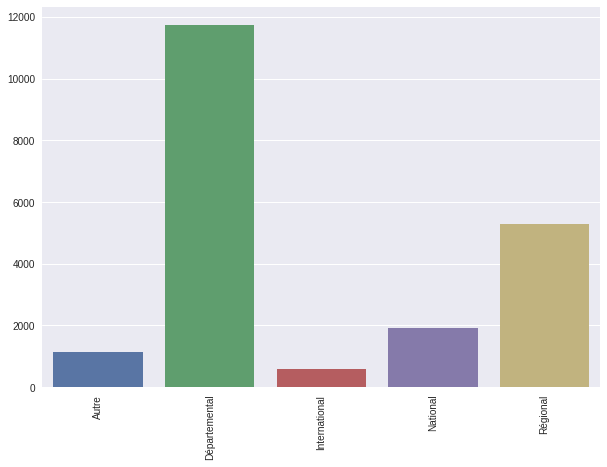

In [52]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [53]:
type_code = dict()
for x in data["TRAVEL_FREQUENCY_NAME"].unique():
    if type(x) is str:
        type_code[x] = [data["TRAVEL_FREQUENCY_NAME"][data["TRAVEL_FREQUENCY_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

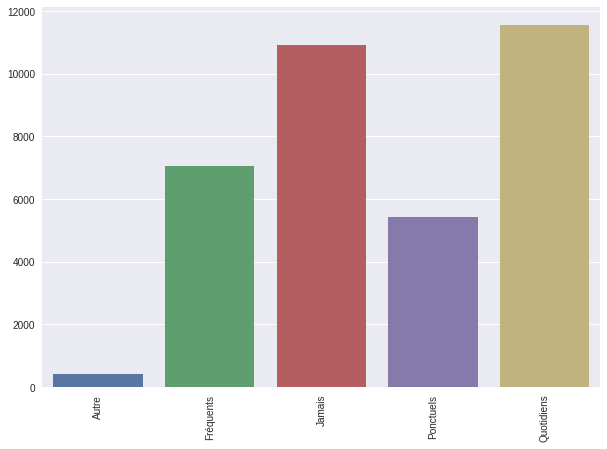

In [54]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [55]:
type_code = dict()
for x in data["DRIVING_LIC_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["DRIVING_LIC_NAME_1"][data["DRIVING_LIC_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

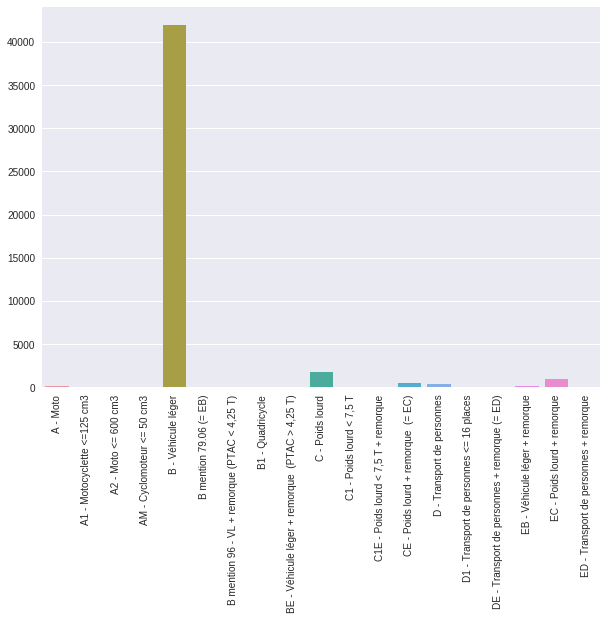

In [56]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [57]:
type_code = dict()
for x in data["DRIVING_LIC_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["DRIVING_LIC_NAME_2"][data["DRIVING_LIC_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

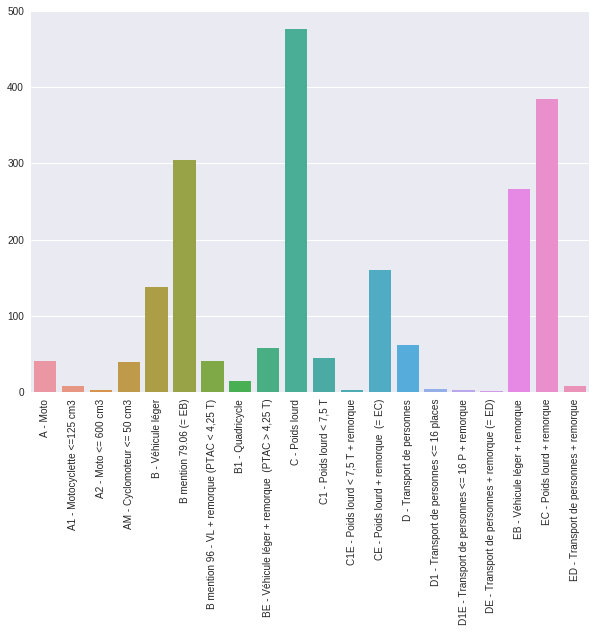

In [58]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [59]:
type_code = dict()
for x in data["DRIVING_LIC_REQ_NAME_1"].unique():
    if type(x) is str:
        type_code[x] = [data["DRIVING_LIC_REQ_NAME_1"][data["DRIVING_LIC_REQ_NAME_1"] == x].count()]
type_code = pd.DataFrame(type_code)

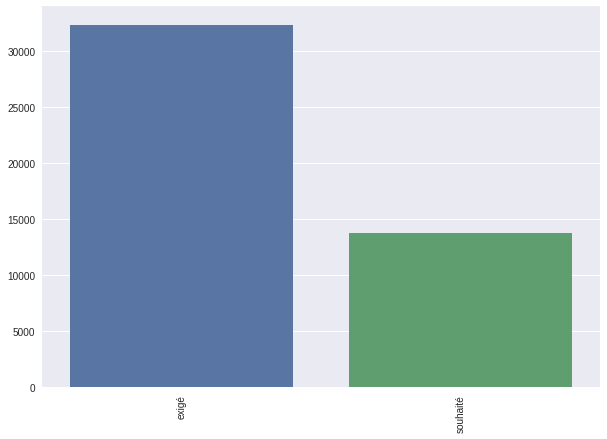

In [60]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [61]:
type_code = dict()
for x in data["DRIVING_LIC_REQ_NAME_2"].unique():
    if type(x) is str:
        type_code[x] = [data["DRIVING_LIC_REQ_NAME_2"][data["DRIVING_LIC_REQ_NAME_2"] == x].count()]
type_code = pd.DataFrame(type_code)

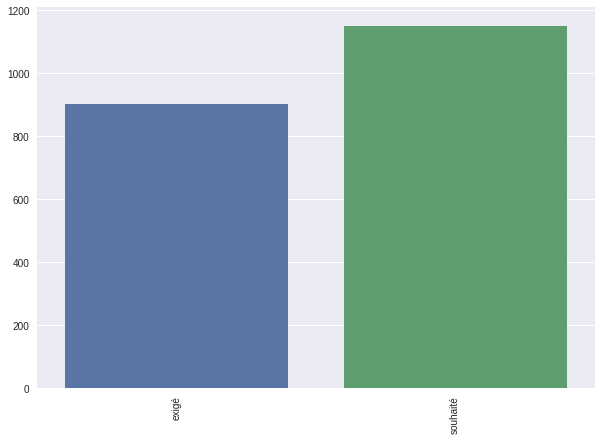

In [62]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()

In [96]:
tmp = data[data["LONGITUDE"] > -20]
tmp.reset_index()
tmp = tmp[tmp["LONGITUDE"] < 20]

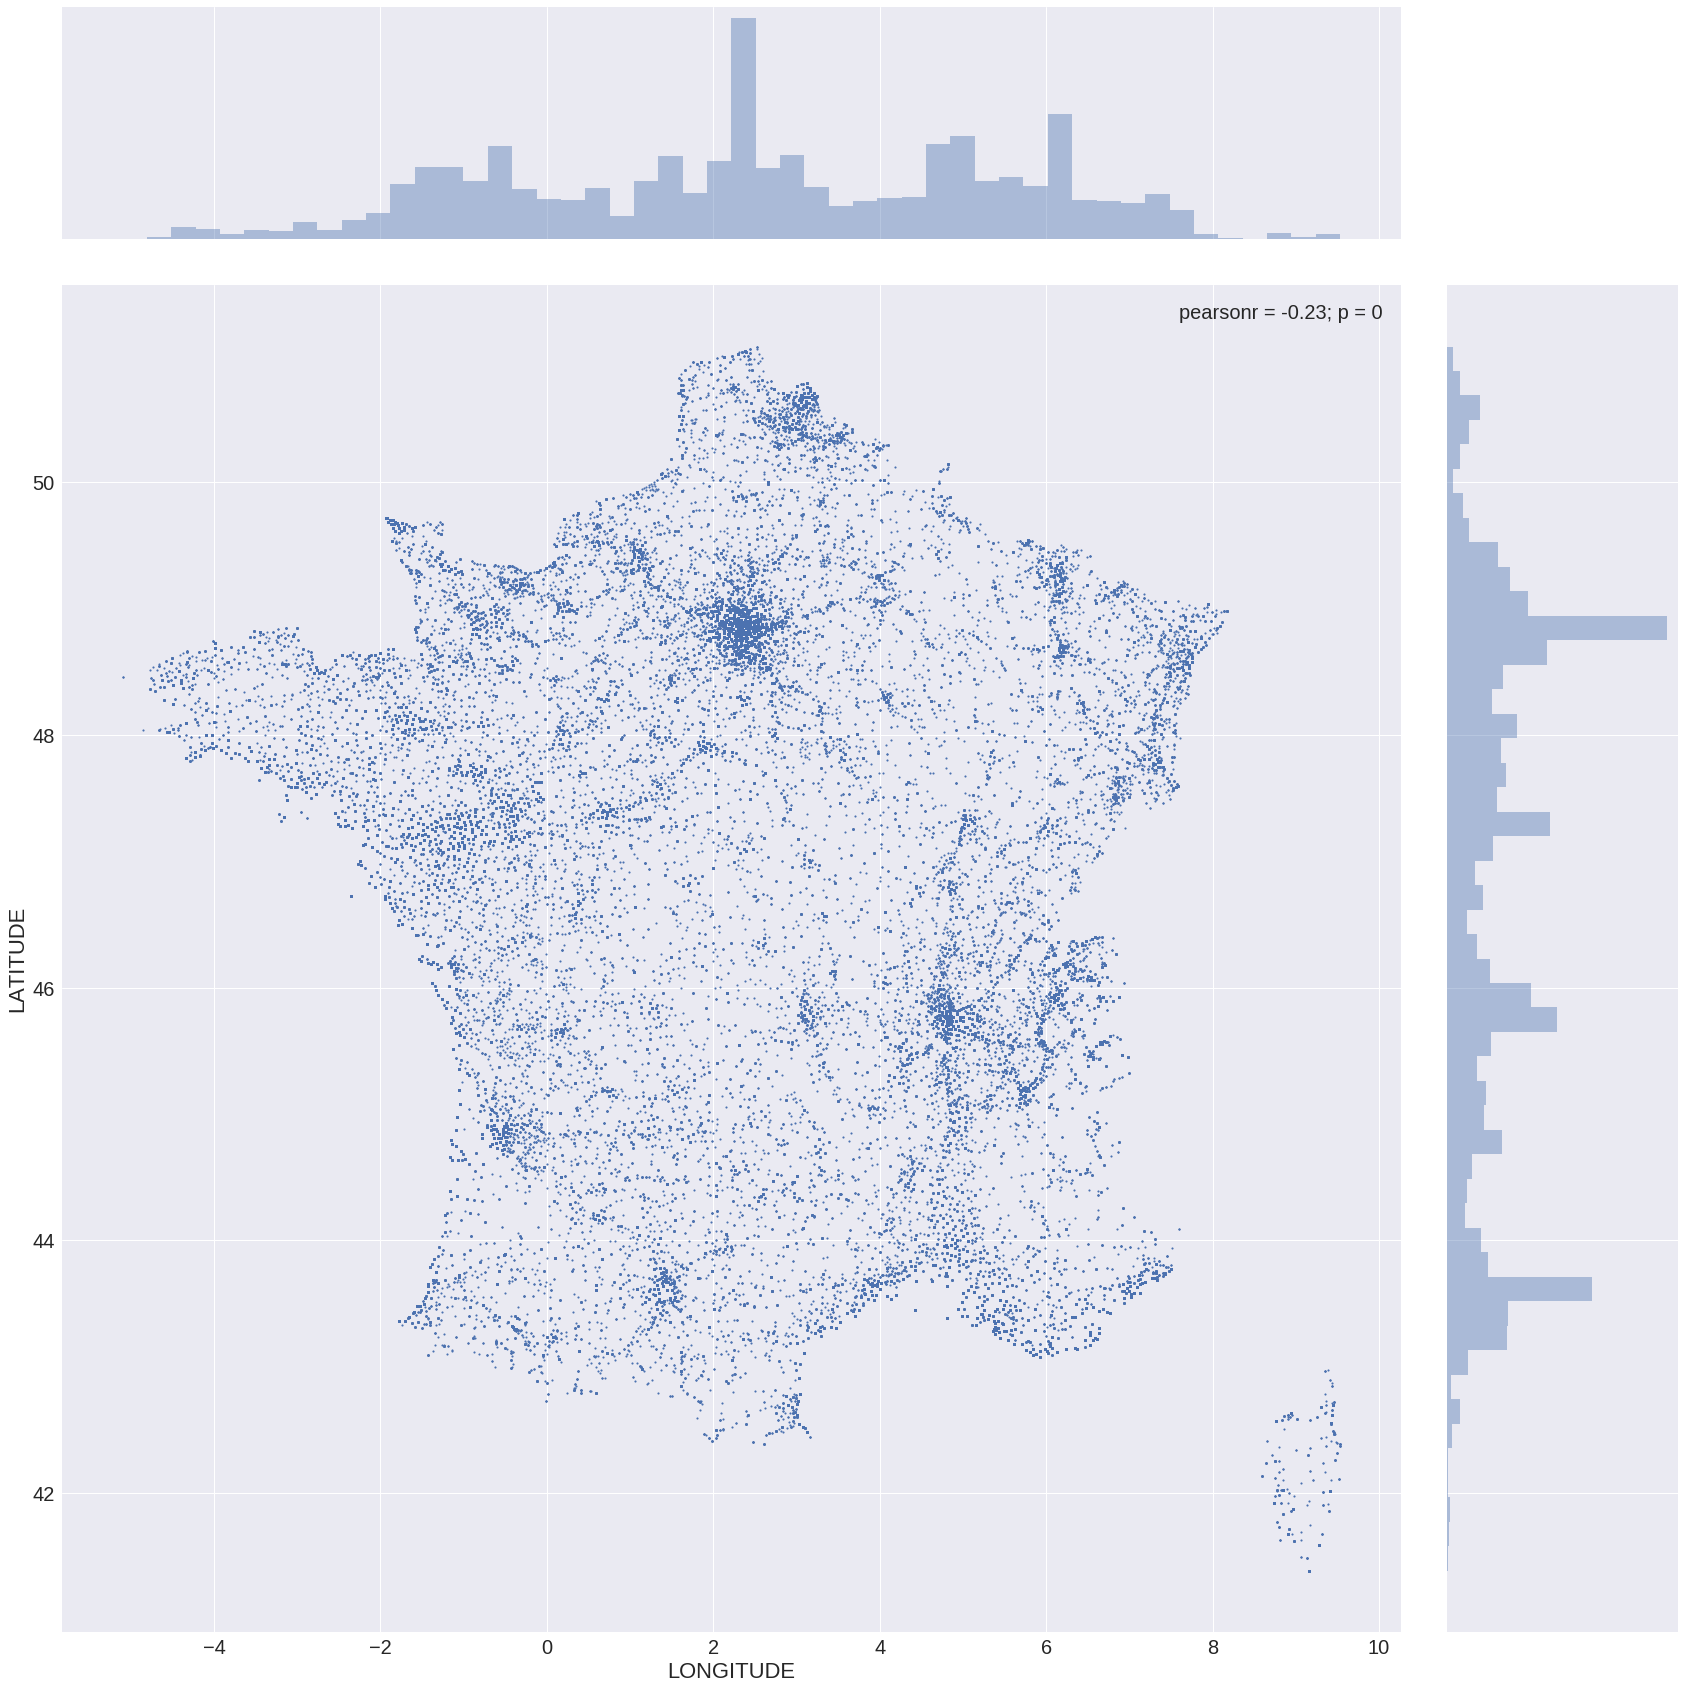

In [97]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=2)
sns.jointplot("LONGITUDE", "LATITUDE", data=tmp, size=24, joint_kws={"s": 3})
plt.show()

In [95]:
type_code = dict()
for x in data["EM_INTERVIEW_MODALITY_NAME"].unique():
    if type(x) is str:
        type_code[x] = [data["EM_INTERVIEW_MODALITY_NAME"][data["EM_INTERVIEW_MODALITY_NAME"] == x].count()]
type_code = pd.DataFrame(type_code)

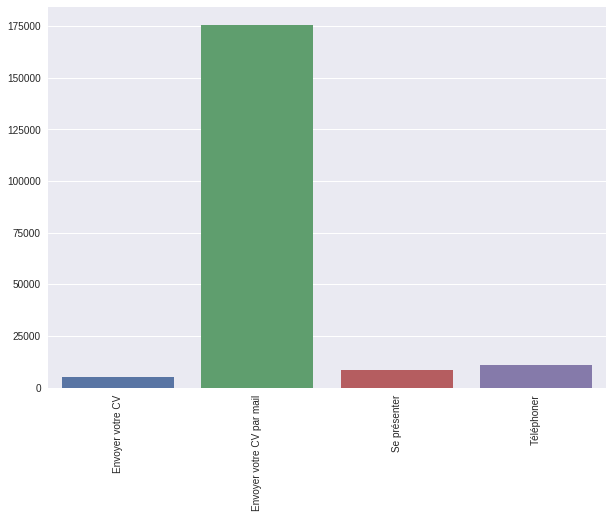

In [78]:
plt.figure(figsize=(10, 7))
g = sns.barplot(data=type_code)
g.set_xticklabels(rotation=90, labels=type_code.columns.values)
plt.show()